# Question 1

Identify the Top Complaint Type

# Imports + Options

In [2]:
# Normal data analysis packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 40

sns.set_style('whitegrid')

# Data

## Data Import 

In [4]:
df311 = pd.read_csv('311_Service_Requests_from_2010_to_Present_min.csv')

In [5]:
df311.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [6]:
df311.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              6019843 non-null  int64  
 1   Unique Key              6019843 non-null  int64  
 2   Created Date            6019843 non-null  object 
 3   Closed Date             5893186 non-null  object 
 4   Complaint Type          6019843 non-null  object 
 5   Location Type           5967019 non-null  object 
 6   Incident Zip            5939146 non-null  float64
 7   Incident Address        5967018 non-null  object 
 8   Street Name             5967018 non-null  object 
 9   Address Type            5935078 non-null  object 
 10  City                    5939569 non-null  object 
 11  Status                  6019843 non-null  object 
 12  Resolution Description  6012017 non-null  object 
 13  Borough                 6019843 non-null  object 
 14  La

## Data Cleaning

In [7]:
# Drop blank column
if 'Unnamed: 0' in df311.columns:
    df311 = df311.drop('Unnamed: 0',axis=1)

# Convert date to datetime and create year/month column
if 'Year' not in df311.columns:
    df311['Created DateTime'] = pd.to_datetime(df311['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
    df311['Year'] = pd.DatetimeIndex(df311['Created DateTime']).year
    df311['Month'] = pd.DatetimeIndex(df311['Created DateTime']).month
    
# Cleaning up the complaint types 
df311['Complaint Type'] = df311['Complaint Type'].str.upper()
df311['Complaint Type'].replace('HEATING', 'HEAT/HOT WATER', inplace=True)
df311['Complaint Type'].replace('PAINT - PLASTER', 'PAINT/PLASTER', inplace=True)

# EDA
  - Which complaint type is the most common
  - Examine trends over years / months
  - Are there significant repeated complaints/ does this affect distribution

Complaint Type
MOLD                            1
VACANT APARTMENT                6
AGENCY                          9
STRUCTURAL                     16
CONSTRUCTION                 5078
ELEVATOR                     6725
OUTSIDE BUILDING             7148
SAFETY                      51953
HPD LITERATURE REQUEST      52824
APPLIANCE                  112835
FLOORING/STAIRS            137402
GENERAL                    152471
WATER LEAK                 193631
DOOR/WINDOW                205278
NONCONST                   260890
ELECTRIC                   307311
UNSANITARY CONDITION       457142
GENERAL CONSTRUCTION       500863
PAINT/PLASTER              707695
PLUMBING                   711141
HEAT/HOT WATER            2149424
Name: Unique Key, dtype: int64


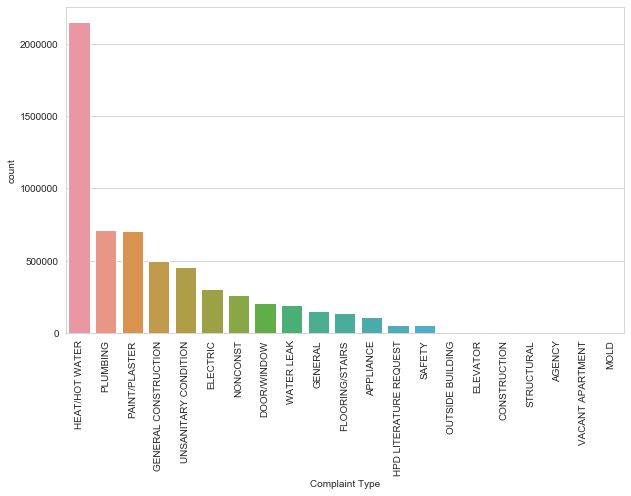

In [8]:
# Plot 
plt.figure(figsize=(10,6))
sns.countplot('Complaint Type', data=df311, order = df311['Complaint Type'].value_counts().index)

plt.xticks(rotation=90)

# Values 
print(df311.groupby('Complaint Type').count()['Unique Key'].sort_values())

Complaint Type,AGENCY,APPLIANCE,CONSTRUCTION,DOOR/WINDOW,ELECTRIC,ELEVATOR,FLOORING/STAIRS,GENERAL,GENERAL CONSTRUCTION,HEAT/HOT WATER,HPD LITERATURE REQUEST,MOLD,NONCONST,OUTSIDE BUILDING,PAINT/PLASTER,PLUMBING,SAFETY,STRUCTURAL,UNSANITARY CONDITION,VACANT APARTMENT,WATER LEAK
Year,,,,,,,,,,,,,,,,,,,,,
2010,NaN,15017.0,1312.0,NaN,39036.0,NaN,NaN,NaN,127131.0,214218.0,7718.0,NaN,69659.0,NaN,93194.0,111504.0,NaN,NaN,NaN,NaN,NaN
2011,NaN,13611.0,1405.0,NaN,37802.0,NaN,NaN,NaN,133242.0,190184.0,7178.0,NaN,68407.0,NaN,100704.0,113218.0,NaN,NaN,NaN,NaN,NaN
2012,NaN,5981.0,1064.0,NaN,35398.0,NaN,NaN,4.0,112436.0,182974.0,5455.0,NaN,60055.0,NaN,77288.0,87561.0,NaN,NaN,NaN,NaN,NaN
2013,NaN,5525.0,1033.0,NaN,35101.0,NaN,NaN,1283.0,112169.0,202896.0,4175.0,NaN,53831.0,NaN,78848.0,86564.0,NaN,16.0,NaN,NaN,NaN
2014,2.0,10330.0,264.0,28912.0,30387.0,707.0,21092.0,26208.0,15885.0,230310.0,1874.0,NaN,8938.0,1410.0,75593.0,63190.0,7458.0,NaN,61764.0,NaN,28916.0
2015,1.0,11237.0,NaN,40003.0,30129.0,1095.0,27811.0,26749.0,NaN,225678.0,13364.0,NaN,NaN,1682.0,69689.0,55395.0,9846.0,NaN,82867.0,2.0,35565.0
2016,2.0,12902.0,NaN,37524.0,28007.0,967.0,24811.0,26815.0,NaN,227959.0,4738.0,NaN,NaN,1098.0,60336.0,52592.0,8572.0,NaN,80469.0,2.0,31954.0
2017,3.0,12609.0,NaN,35012.0,25920.0,1278.0,23935.0,24964.0,NaN,213521.0,3837.0,NaN,NaN,1273.0,57076.0,49969.0,8648.0,NaN,79282.0,2.0,32181.0
2018,1.0,14725.0,NaN,38107.0,27545.0,1571.0,25195.0,26237.0,NaN,223835.0,3259.0,NaN,NaN,1068.0,59570.0,53359.0,9568.0,NaN,86621.0,NaN,39266.0


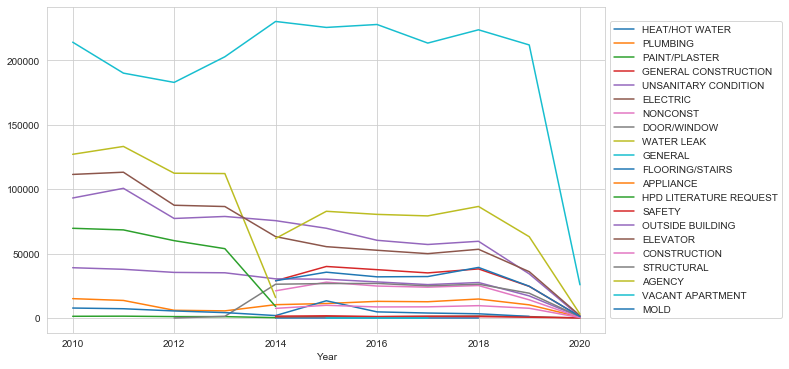

In [9]:
fig,ax = plt.subplots(figsize=(10,6))
df311.groupby(['Year','Complaint Type']).count()['Unique Key'].unstack().plot(ax=ax)
plt.legend(df311['Complaint Type'].value_counts().index, loc='center left', bbox_to_anchor=(1.0, 0.5))

df311.groupby(['Year','Complaint Type']).count()['Unique Key'].unstack()

In [13]:
df311_heat = df311[df311['Complaint Type'] == 'HEAT/HOT WATER']
df311_heat.rename(columns = {'Complaint Type': 'Number of Heat Complaints'},inplace= True)

/Users/ianreynolds/Desktop/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df311_heat.groupby(['Year','Month']).count()['Number of Heat Complaints']

Year  Month
2010  1        40213
      2        24616
      3        17621
      4         9779
      5         5940
      6         1958
      7         1717
      8         1912
      9         2201
      10       19525
      11       37305
      12       51431
2011  1        39659
      2        24690
      3        21762
      4        11788
      5         4362
      6         2045
      7         1791
      8         1943
      9         2196
      10       22105
      11       25360
      12       32483
2012  1        38491
      2        21464
      3        15291
      4        11192
      5         4102
      6         2373
      7         2299
      8         2288
      9         2289
      10       12993
      11       40322
      12       29870
2013  1        43524
      2        29113
      3        20627
      4        12147
      5         5526
      6         2418
      7         2074
      8         2017
      9         2484
      10       14915
      11       35295
 

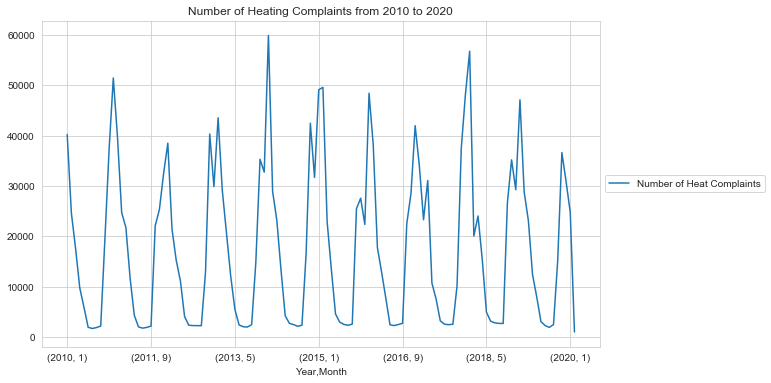

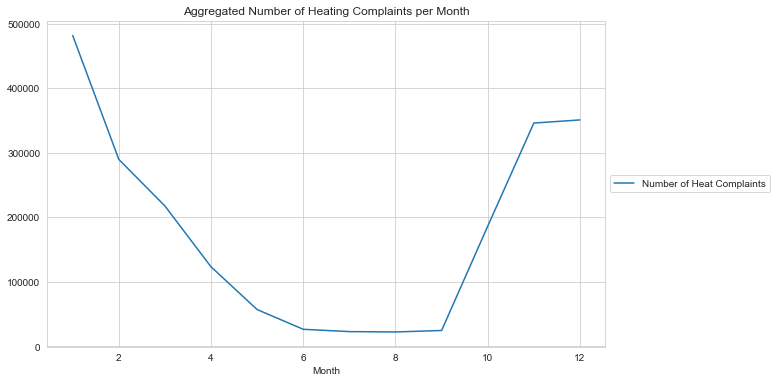

In [15]:
fig,ax = plt.subplots(figsize=(10,6))
df311_heat.groupby(['Year','Month']).count()['Number of Heat Complaints'].plot(ax=ax)
plt.title('Number of Heating Complaints from 2010 to 2020')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

fig,ax = plt.subplots(figsize=(10,6))
df311_heat.groupby(['Month']).count()['Number of Heat Complaints'].plot(ax=ax)
plt.title('Aggregated Number of Heating Complaints per Month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [20]:
df311_heat.to_pickle('df311_heat.pkl')

# Conclusions

 - Multiple changes in how the complaint types were categorized in 2014. General construction, construction, and nonconstruction were split into multiple categories such as door/window, elevator, safety, unsanitary condition, and water leak.  This may increase some of the lesser values, but does not affect the fact that HEAT/HOT WATER was the most common
 - There are decreases from 2010 in most of the complaint categories, but heat/hot water increased 2010-2014 and remained stagnant 2014-2018
 - Complaints are cyclical, hitting the minimum of the cycle in June/July/Aug